**EJERCICIO 1: Dataset Regresión Lineal**

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.32000

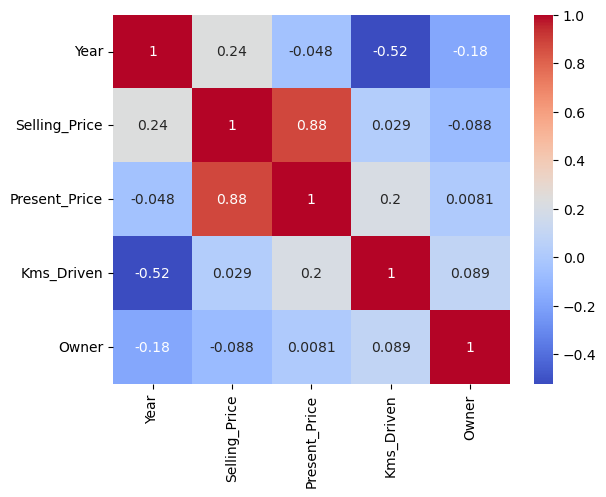

C:\Users\cesar\AppData\Local\Temp\ipykernel_11808\257614419.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


MSE: 4.173183190823386
R²: 0.8534398470941681


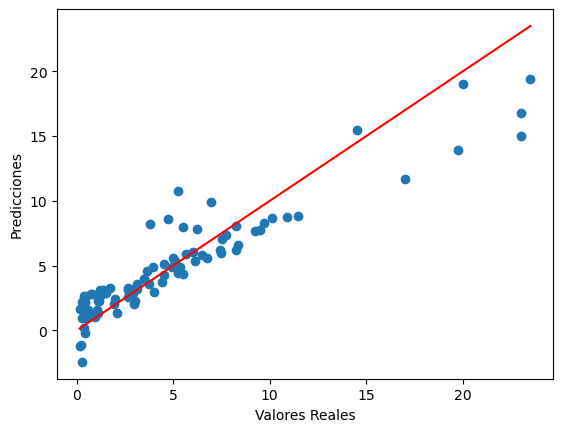

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset de automóviles
data = pd.read_csv('Anexo 2 - Dataset Vehicle/car data.csv')

# Exploración de los datos
print(data.head())
print(data.describe())
print(data.info())

# Convertir las columnas categóricas a tipo numérico si es necesario
# Aquí asumo que tienes columnas categóricas como 'car_name' o 'brand', que no son útiles para la correlación
# Vamos a eliminarlas temporalmente solo para visualizar la matriz de correlación
data_numeric = data.select_dtypes(include=[float, int])  # Seleccionar solo columnas numéricas

# Correlación para ver relaciones con el precio
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm')  # Ahora solo incluye variables numéricas
plt.show()

# Preprocesamiento (llenar valores faltantes si es necesario)
data.fillna(method='ffill', inplace=True)

# Supongamos que la columna objetivo es 'price' y vamos a quitarla de las características (X)
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']

# Estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=[float, int]))  # Estandarizar solo las columnas numéricas

# División en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Entrenar el modelo de Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicciones
y_pred = lr_model.predict(X_test)

# Evaluación del desempeño
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')

# Visualización de resultados
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

**EJERCICIO 2: Dataset Regresión Logística**